In [4]:
import pandas as pd
import numpy as np
from utide import solve, reconstruct
import matplotlib.pyplot as plt
from datetime import timedelta

In [ ]:
# Step 1: Load and prepare data
df = pd.read_csv("CO-OPS_8516945_met.csv")
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time (GMT)'], format='%Y/%m/%d %H:%M')
df_clean = df[['Datetime', 'Verified (m)']].dropna()


In [6]:
# Step 2: Prepare time and tidal elevation arrays
t = (df_clean['Datetime'] - df_clean['Datetime'].iloc[0]).dt.total_seconds().values / 3600.0  # time in hours
h = df_clean['Verified (m)'].values


In [14]:
# Step 3: Harmonic analysis using UTide
coef = solve(t, h, lat=40.0, method='ols', conf_int='linear')  # Latitude is optional
print(coef)


solve: matrix prep ... solution ... done.
A       :                                       []
A_ci    :                                       []
PE      :                                       []
SNR     :                                       []
aux     : frq     :                                       []
lat     :                                     40.0
lind    :                                       []
opt     : RunTimeDisp :                                     True
cnstit      :                                     auto
conf_int    :                                     True
diagnminsnr :                                        2
diagnplots  :                                        0
epoch       :                                     None
equi        :                                     True
gwchlint    :                                    False
gwchnone    :                                    False
infer       :                                     None
inferaprx   :                  

In [8]:
# Step 4: Prediction on training data
recon = reconstruct(t, coef)
h_pred = recon.h


prep/calcs ... done.


In [9]:
# Step 5: Future prediction for 1 year ahead
t_future = np.arange(t[-1] + 1, t[-1] + 24*365 + 1)  # hourly for 1 year
recon_future = reconstruct(t_future, coef)
h_future = recon_future.h

prep/calcs ... done.


In [10]:
# Step 6: Convert time arrays to datetime
start_time = df_clean['Datetime'].iloc[0]
datetime_train = [start_time + timedelta(hours=float(hr)) for hr in t]
datetime_future = [start_time + timedelta(hours=float(hr)) for hr in t_future]

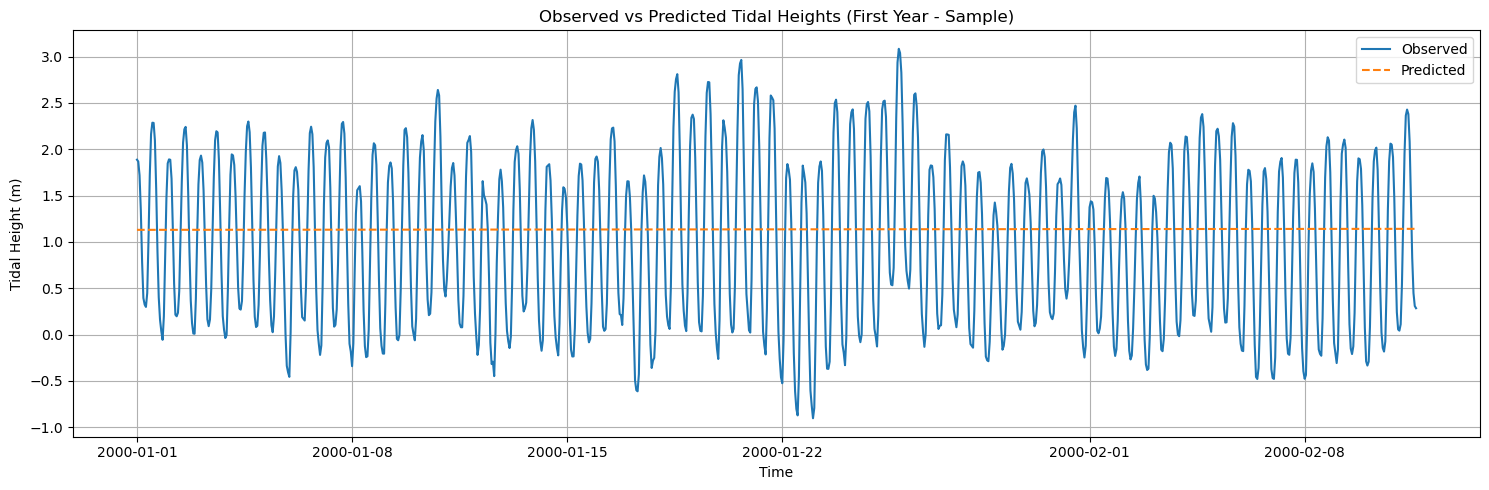

In [11]:
# Step 7: Plotting

# Plot 1: Observed vs Predicted (Training Period, Sample)
plt.figure(figsize=(15, 5))
plt.plot(datetime_train[:1000], h[:1000], label='Observed')
plt.plot(datetime_train[:1000], h_pred[:1000], label='Predicted', linestyle='--')
plt.title("Observed vs Predicted Tidal Heights (First Year - Sample)")
plt.xlabel("Time")
plt.ylabel("Tidal Height (m)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

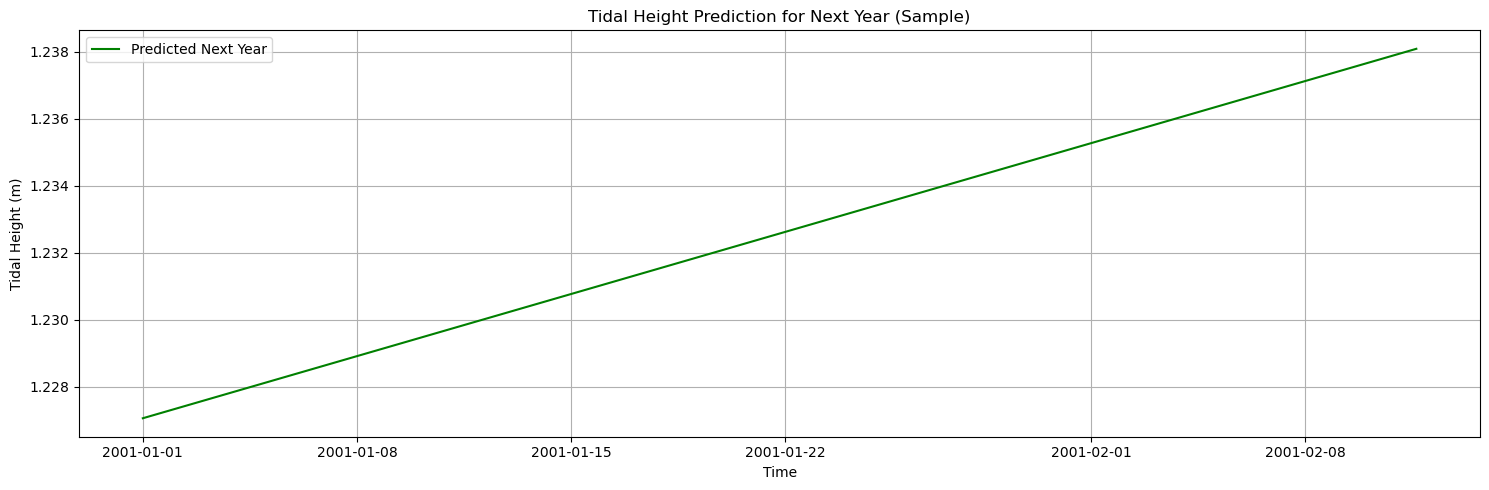

In [12]:
# Plot 2: Future Prediction (Next Year - Sample)
plt.figure(figsize=(15, 5))
plt.plot(datetime_future[:1000], h_future[:1000], label='Predicted Next Year', color='green')
plt.title("Tidal Height Prediction for Next Year (Sample)")
plt.xlabel("Time")
plt.ylabel("Tidal Height (m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
# Step 8: Top 10 Tidal Constituents
print("\nTop 10 Derived Tidal Constituents (by amplitude):")
top_constituents = sorted(zip(coef.name, coef.A, coef.g), key=lambda x: x[1], reverse=True)[:10]
for name, amp, phase in top_constituents:
    print(f"{name:>5s} | Amplitude: {amp:.4f} m | Phase: {phase:.2f}°")


Top 10 Derived Tidal Constituents (by amplitude):
